In [69]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Replace 'your_file_path.parquet.gz' with the path to your gzipped Parquet file
file_path1 =  './data/2024/03/22/BTC_USDT_GateIOFutures_20240322_0_orderbook_snapshot.parquet.gzip'
file_path2 =  './data/2024/03/22/BTC_USDT_GateIOFutures_20240322_0_orderbook.parquet.gzip'
file_path3 =  './data/2024/03/22/BTC_USDT_GateIOFutures_20240322_0_trades.parquet.gzip'
# Load the gzipped Parquet file
df1 = pd.read_parquet(file_path1, engine='auto')  # engine can be 'pyarrow' or 'fastparquet'
df2 = pd.read_parquet(file_path2, engine='auto')  # engine can be 'pyarrow' or 'fastparquet'
df3 = pd.read_parquet(file_path3, engine='auto')  # engine can be 'pyarrow' or 'fastparquet'

In [70]:
# Print the first few rows of the DataFrame
print(df1.head(5))


         capture_ts_ns   exchange_ts     create_ts      prev_id           id  \
0  1711065603559203584  1.711066e+09  1.711066e+09  57893398655  57893398655   
1  1711065609468474624  1.711066e+09  1.711066e+09  57893408281  57893408281   
2  1711065615406123008  1.711066e+09  1.711066e+09  57893414253  57893414253   
3  1711065621326729216  1.711066e+09  1.711066e+09  57893421355  57893421355   
4  1711065627245643520  1.711066e+09  1.711066e+09  57893425029  57893425029   

     a0_px   a0_qty  a0_count    a1_px  a1_qty  ...  b16_count   b17_px  \
0  65550.5  29958.0         1  65550.6  1541.0  ...          1  65537.8   
1  65543.7   6093.0         1  65546.0   196.0  ...          1  65531.5   
2  65548.8  24149.0         1  65548.9    86.0  ...          1  65539.9   
3  65557.3   8853.0         1  65558.1     2.0  ...          1  65542.5   
4  65564.6  18720.0         1  65564.7    86.0  ...          1  65551.9   

   b17_qty  b17_count   b18_px  b18_qty  b18_count   b19_px  b19_qty

In [75]:
print(df2.head(5))

         capture_ts_ns   exchange_ts     create_ts      prev_id           id  \
0  1711065603535263744  1.711066e+12  1.711066e+12  57893398655  57893398659   
1  1711065603574762240  1.711066e+12  1.711066e+12  57893398660  57893398663   
2  1711065603615163136  1.711066e+12  1.711066e+12  57893398664  57893398680   
3  1711065603635443456  1.711066e+12  1.711066e+12  57893398681  57893398683   
4  1711065603714465536  1.711066e+12  1.711066e+12  57893398684  57893398686   

     a0_px   a0_qty  a0_count    a1_px  a1_qty  ...  b16_count   b17_px  \
0  65550.5  29958.0         1  65550.6  1541.0  ...          1  65537.8   
1  65550.5  30103.0         1  65550.6  1541.0  ...          1  65537.8   
2  65550.5  30248.0         1  65550.6  1541.0  ...          1  65538.5   
3  65550.5  30248.0         1  65550.6  1541.0  ...          1  65538.3   
4  65550.5  30393.0         1  65550.6  1541.0  ...          1  65537.8   

   b17_qty  b17_count   b18_px  b18_qty  b18_count   b19_px  b19_qty

In [83]:
# preprocess orderbook data
ask_cols = df2.filter(regex=r'^a\d+_qty$')
bid_cols = df2.filter(regex=r'^b\d+_qty$')

ask_sums = ask_cols.sum(axis=1)
bid_sums = bid_cols.sum(axis=1)

newData = pd.DataFrame({
    'low_ask': df2['a0_px'],
    'high_bid': df2['b0_px'],
    'ask_sum': ask_sums,
    'bid_sum': bid_sums
})

print(newData.head(5))

     a0_px    b0_px  ask_sum  bid_sum
0  65550.5  65550.4  39492.0  23138.0
1  65550.5  65550.4  39637.0  22703.0
2  65550.5  65550.4  39782.0  14427.0
3  65550.5  65550.4  39782.0  19065.0
4  65550.5  65550.4  39927.0  22703.0


In [5]:
print(df3.head(5))

         capture_ts_ns    exchange_ts      create_ts         id       px  \
0  1711065604445214637  1711065604337  1711065604327  282864809  65550.4   
1  1711065604445945186  1711065604337  1711065604328  282864810  65550.4   
2  1711065604481719320  1711065604373  1711065604362  282864811  65550.3   
3  1711065604481968825  1711065604373  1711065604362  282864812  65550.3   
4  1711065604482150177  1711065604373  1711065604362  282864813  65550.3   

   signed_qty  contract  
0        -1.0  BTC_USDT  
1       -27.0  BTC_USDT  
2        -2.0  BTC_USDT  
3        -1.0  BTC_USDT  
4       -27.0  BTC_USDT  


In [6]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Columns: 125 entries, capture_ts_ns to b19_count
dtypes: float64(82), int64(43)
memory usage: 591.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148573 entries, 0 to 148572
Columns: 125 entries, capture_ts_ns to b19_count
dtypes: float64(82), int64(43)
memory usage: 141.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27928 entries, 0 to 27927
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   capture_ts_ns  27928 non-null  int64  
 1   exchange_ts    27928 non-null  int64  
 2   create_ts      27928 non-null  int64  
 3   id             27928 non-null  int64  
 4   px             27928 non-null  float64
 5   signed_qty     27928 non-null  float64
 6   contract       27928 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 1.5+ MB
None


In [7]:
df1.describe()

,capture_ts_ns,exchange_ts,create_ts,prev_id,id,a0_px,a0_qty,a0_count,a1_px,a1_qty,...,b16_count,b17_px,b17_qty,b17_count,b18_px,b18_qty,b18_count,b19_px,b19_qty,b19_count
count,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,606.000000,606.000000,606.0,606.000000,606.000000,...,606.0,606.000000,606.000000,606.0,606.000000,606.000000,606.0,606.000000,606.000000,606.0
mean,1.711067e+18,1.711067e+09,1.711067e+09,5.789504e+10,5.789504e+10,65742.046370,9981.069307,1.0,65744.186634,671.780528,...,1.0,65729.748020,1212.818482,1.0,65729.353960,1107.364686,1.0,65728.952805,1250.833333,1.0
std,1.039627e+12,1.039628e+03,1.039628e+03,9.815012e+05,9.815012e+05,129.148909,8903.481026,0.0,129.139668,1833.488857,...,0.0,129.696254,1634.609817,0.0,129.714388,1665.498961,0.0,129.714575,1713.079098,0.0
min,1.711066e+18,1.711066e+09,1.711066e+09,5.789340e+10,5.789340e+10,65436.800000,1.000000,1.0,65442.200000,1.000000,...,1.0,65419.900000,1.000000,1.0,65418.900000,1.000000,1.0,65418.700000,1.000000,1.0
25%,1.711067e+18,1.711067e+09,1.711067e+09,5.789417e+10,5.789417e+10,65656.350000,2731.250000,1.0,65656.450000,18.000000,...,1.0,65643.450000,180.000000,1.0,65643.225000,131.000000,1.0,65642.475000,304.000000,1.0
50%,1.711067e+18,1.711067e+09,1.711067e+09,5.789495e+10,5.789495e+10,65774.000000,8120.000000,1.0,65775.100000,57.000000,...,1.0,65761.650000,629.500000,1.0,65761.100000,409.000000,1.0,65760.300000,686.500000,1.0
75%,1.711068e+18,1.711068e+09,1.711068e+09,5.789587e+10,5.789587e+10,65832.300000,15020.000000,1.0,65834.300000,224.250000,...,1.0,65821.150000,1662.000000,1.0,65820.725000,1513.000000,1.0,65820.325000,1609.000000,1.0
max,1.711069e+18,1.711069e+09,1.711069e+09,5.789674e+10,5.789674e+10,66013.300000,47830.000000,1.0,66018.500000,15861.000000,...,1.0,66001.500000,14919.000000,1.0,66001.300000,11967.000000,1.0,66000.100000,14477.000000,1.0


In [8]:
df2.describe()

,capture_ts_ns,exchange_ts,create_ts,prev_id,id,a0_px,a0_qty,a0_count,a1_px,a1_qty,...,b16_count,b17_px,b17_qty,b17_count,b18_px,b18_qty,b18_count,b19_px,b19_qty,b19_count
count,1.485730e+05,1.485730e+05,1.485730e+05,1.485730e+05,1.485730e+05,148573.000000,148573.000000,148573.0,148573.000000,148573.000000,...,148573.0,148573.000000,148573.000000,148573.0,148573.000000,148573.000000,148573.0,148573.000000,148573.000000,148573.0
mean,1.711067e+18,1.711067e+12,1.711067e+12,5.789505e+10,5.789505e+10,65741.778876,9667.058288,1.0,65743.760001,782.932612,...,1.0,65729.369139,1128.638528,1.0,65728.974049,1133.571557,1.0,65728.588694,1174.873510,1.0
std,1.036716e+12,1.036716e+06,1.036716e+06,9.790497e+05,9.790500e+05,129.541829,8878.543945,0.0,129.458081,2328.793658,...,0.0,130.152202,1613.452881,0.0,130.175086,1589.546523,0.0,130.194560,1638.386458,0.0
min,1.711066e+18,1.711066e+12,1.711066e+12,5.789340e+10,5.789340e+10,65409.700000,1.000000,1.0,65411.100000,1.000000,...,1.0,65398.600000,1.000000,1.0,65397.700000,1.000000,1.0,65396.500000,1.000000,1.0
25%,1.711067e+18,1.711067e+12,1.711067e+12,5.789419e+10,5.789419e+10,65656.000000,2506.000000,1.0,65657.600000,11.000000,...,1.0,65642.900000,153.000000,1.0,65642.400000,177.000000,1.0,65641.700000,185.000000,1.0
50%,1.711067e+18,1.711067e+12,1.711067e+12,5.789499e+10,5.789499e+10,65773.200000,7844.000000,1.0,65775.500000,55.000000,...,1.0,65760.500000,523.000000,1.0,65760.300000,608.000000,1.0,65760.000000,615.000000,1.0
75%,1.711068e+18,1.711068e+12,1.711068e+12,5.789589e+10,5.789589e+10,65833.200000,14291.000000,1.0,65834.800000,279.000000,...,1.0,65821.900000,1524.000000,1.0,65821.400000,1523.000000,1.0,65821.100000,1526.000000,1.0
max,1.711069e+18,1.711069e+12,1.711069e+12,5.789674e+10,5.789674e+10,66037.000000,82703.000000,1.0,66037.300000,66264.000000,...,1.0,66018.200000,23431.000000,1.0,66018.100000,23994.000000,1.0,66015.700000,23860.000000,1.0


In [9]:
df3.describe()

,capture_ts_ns,exchange_ts,create_ts,id,px,signed_qty
count,2.792800e+04,2.792800e+04,2.792800e+04,2.792800e+04,27928.000000,27928.000000
mean,1.711067e+18,1.711067e+12,1.711067e+12,2.828788e+08,65760.663560,6.673947
std,1.001284e+12,1.001293e+06,1.001298e+06,8.062263e+03,144.350963,691.129406
min,1.711066e+18,1.711066e+12,1.711066e+12,2.828648e+08,65409.100000,-19470.000000
25%,1.711066e+18,1.711066e+12,1.711066e+12,2.828718e+08,65692.550000,-7.000000
50%,1.711067e+18,1.711067e+12,1.711067e+12,2.828788e+08,65778.300000,-1.000000
75%,1.711068e+18,1.711068e+12,1.711068e+12,2.828858e+08,65834.700000,15.000000
max,1.711069e+18,1.711069e+12,1.711069e+12,2.828927e+08,66037.600000,20000.000000


In [10]:
#Check missing values
print(df1.isnull().sum())

capture_ts_ns    0
exchange_ts      0
create_ts        0
prev_id          0
id               0
                ..
b18_qty          0
b18_count        0
b19_px           0
b19_qty          0
b19_count        0
Length: 125, dtype: int64


In [11]:
print(df2.isnull().sum())

capture_ts_ns    0
exchange_ts      0
create_ts        0
prev_id          0
id               0
                ..
b18_qty          0
b18_count        0
b19_px           0
b19_qty          0
b19_count        0
Length: 125, dtype: int64


In [12]:
print(df3.isnull().sum())

capture_ts_ns    0
exchange_ts      0
create_ts        0
id               0
px               0
signed_qty       0
contract         0
dtype: int64


In [13]:
X = df3.drop(['id','contract'],axis = 1)

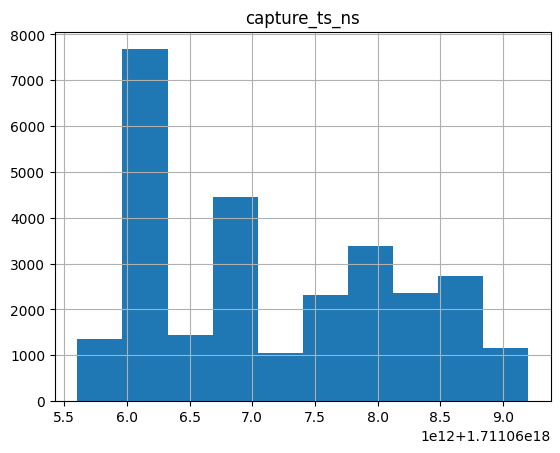

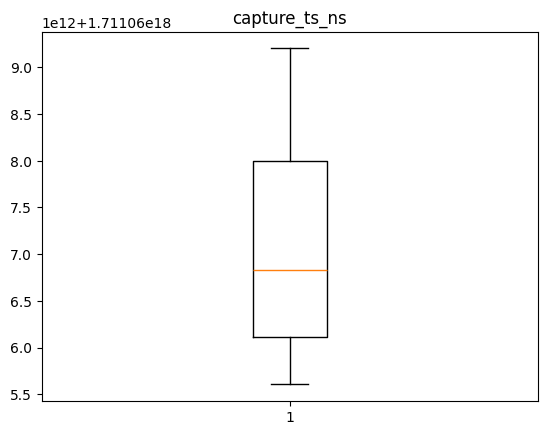

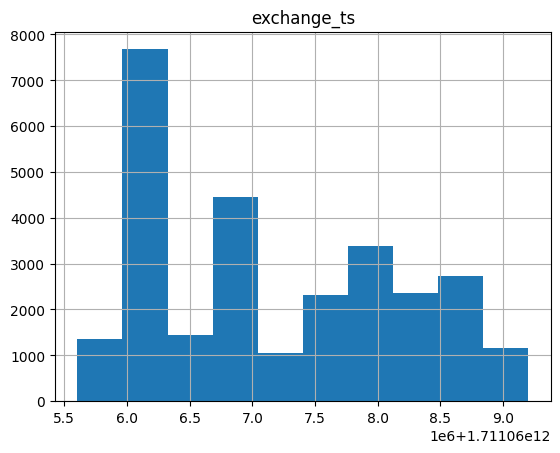

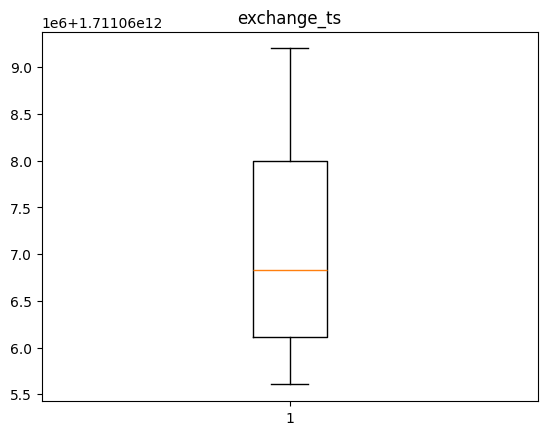

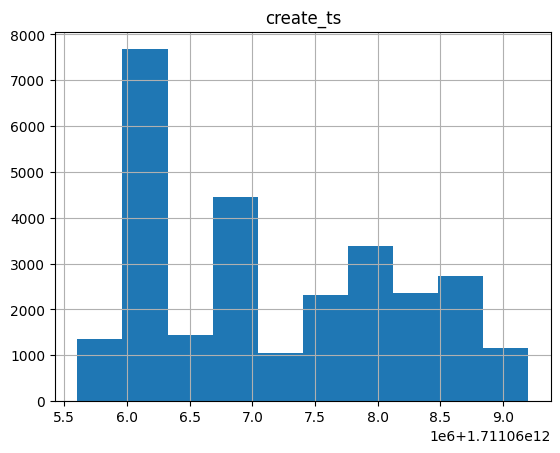

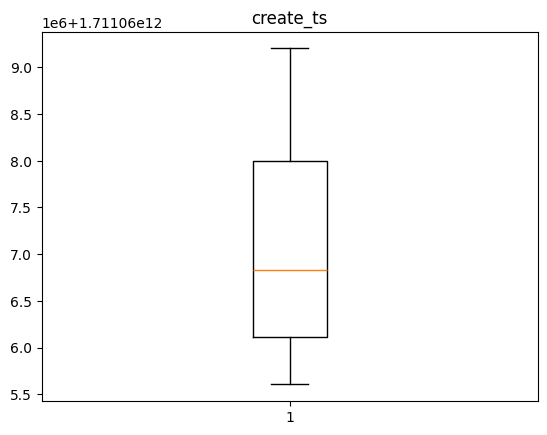

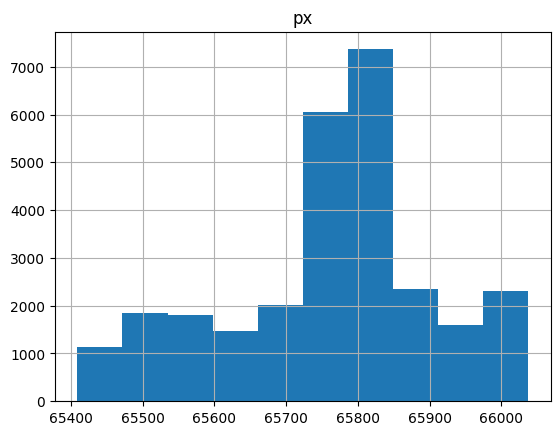

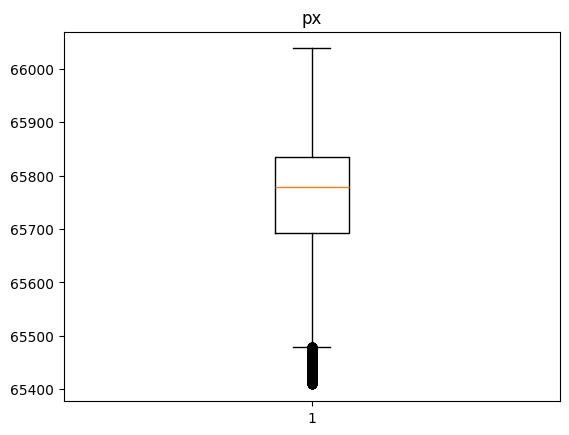

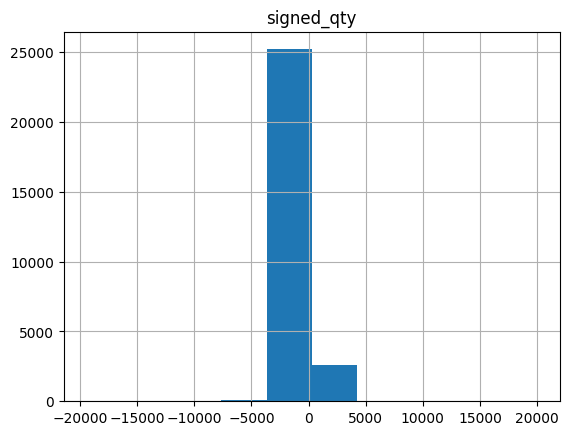

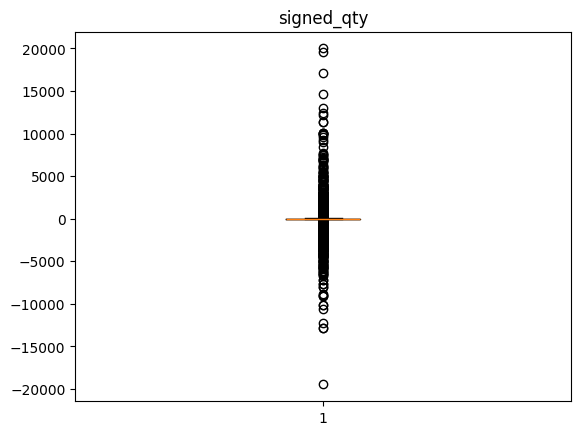

In [14]:
for column in X.columns:
    if X[column].dtype != object:
        plt.figure()
        X[column].hist()
        plt.title(column)

        plt.figure()
        plt.boxplot(X[column])
        plt.title(column)

In [15]:
corr = X.corr()
corr

,capture_ts_ns,exchange_ts,create_ts,px,signed_qty
capture_ts_ns,1.000000,1.000000,1.000000,-0.218839,-0.010715
exchange_ts,1.000000,1.000000,1.000000,-0.218847,-0.010716
create_ts,1.000000,1.000000,1.000000,-0.218847,-0.010716
px,-0.218839,-0.218847,-0.218847,1.000000,0.007996
signed_qty,-0.010715,-0.010716,-0.010716,0.007996,1.000000


<Axes: >

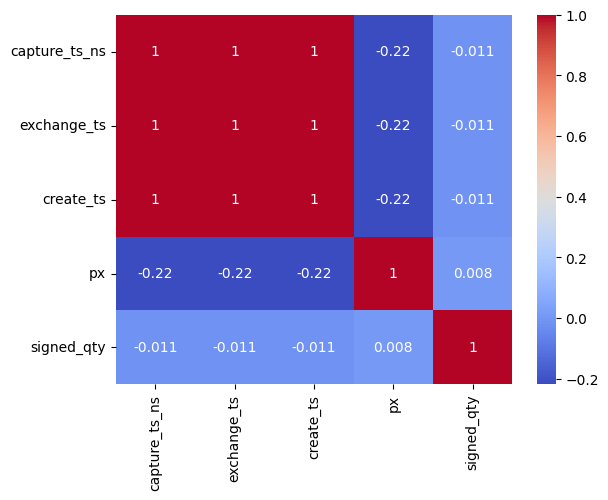

In [16]:
fig, ax = plt.subplots()
sns.heatmap(corr, annot = True, cmap='coolwarm')